In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame from the fetched data
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

# Add the target variable to the DataFrame
df['MEDV'] = target

# Display the first few rows of the DataFrame
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Independent and Dependent features

In [3]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=32)

In [7]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63
38,0.17505,0.0,5.96,0.0,0.499,5.966,30.2,3.8473,5.0,279.0,19.2,393.43,10.13
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
389,8.15174,0.0,18.10,0.0,0.700,5.390,98.9,1.7281,24.0,666.0,20.2,396.90,20.85
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44


In [8]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
295,0.12932,0.0,13.92,0.0,0.437,6.678,31.1,5.9604,4.0,289.0,16.0,396.90,6.27
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5.0,403.0,14.7,396.90,29.29
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92,10.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
333,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
359,4.26131,0.0,18.10,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67


In [9]:
y_train

102    18.6
38     24.7
86     22.5
154    17.0
503    23.9
       ... 
380    10.4
310    16.1
389    11.5
43     24.7
215    25.0
Name: MEDV, Length: 354, dtype: float64

In [10]:
y_test

27     14.8
295    28.6
144    11.8
255    20.9
483    21.8
       ... 
31     14.5
333    22.2
417    10.4
359    22.6
357    21.7
Name: MEDV, Length: 152, dtype: float64

### Standardize the dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)

In [15]:
X_test=scaler.fit_transform(X_test)


In [16]:
X_train

array([[-0.3671644 , -0.49124392, -0.3591367 , ...,  1.15440521,
        -3.33331735, -0.2545634 ],
       [-0.37269335, -0.49124392, -0.73418142, ...,  0.37056108,
         0.38538443, -0.32513149],
       [-0.38537256, -0.49124392, -0.94622594, ...,  0.04780173,
         0.41489154,  0.06017026],
       ...,
       [ 0.44843303, -0.49124392,  1.01698894, ...,  0.83164586,
         0.42538039,  1.18784825],
       [-0.37430849, -0.49124392, -0.59714585, ..., -0.22884914,
         0.39725643, -0.70478778],
       [-0.3703288 , -0.49124392, -0.06631332, ...,  0.09391021,
         0.38768968, -0.41828136]])

In [17]:
X_test

array([[-0.44000908, -0.48259399, -0.48028864, ...,  1.12328405,
        -0.42401126,  0.57006287],
       [-0.60279375, -0.48259399,  0.38735758, ..., -1.21049364,
         0.47779295, -0.95481863],
       [-0.08074433, -0.48259399,  1.23699039, ..., -1.81727584,
         0.47779295,  2.23344405],
       ...,
       [ 4.48121695, -0.48259399,  1.01482492, ...,  0.74987962,
        -2.20749546,  1.86641989],
       [ 0.21107838, -0.48259399,  1.01482492, ...,  0.74987962,
         0.41642404, -0.06842067],
       [ 0.13000415, -0.48259399,  1.01482492, ...,  0.74987962,
         0.42240153,  0.01467914]])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regression=LinearRegression()

In [20]:
regression.fit(X_train,y_train)

LinearRegression()

## Print the coefficients

In [22]:
print(regression.coef_)

[-1.13646122  0.99365925  0.15754257  0.35025167 -1.96224624  2.78388446
 -0.05516873 -2.92752938  2.54140368 -2.01320945 -2.11656283  0.88768332
 -3.43787091]


In [23]:
print(regression.intercept_)

22.87966101694915


In [24]:
##### on which parameter the modle has been trained 
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
### Prediction with test Data
reg_pred=regression.predict(X_test)

In [26]:
reg_pred

array([16.21694826, 29.96333184, 10.79557654, 22.77542912, 21.631883  ,
       30.19500121, 22.10403286, 26.31282116, 21.90159644, 21.36995224,
       37.48181196, 21.79223931, 19.511338  , 17.35006421, 28.67828816,
       21.87915919, 29.60768659, 16.44653708, 22.96481105, 17.16631536,
       20.59690273, 20.57803727, 42.017782  , 18.11536207, 44.55996618,
       12.73915014, 26.46766776, 14.73122714, 22.82052738, 17.96867851,
       28.82711488, 27.65440628, 38.74722751, 21.90559755, 23.91043121,
       24.18914723, 34.10808247, 18.94799555, 28.3042833 , 23.12635918,
       29.79215486, 24.29381965, 24.23224001, 11.71532525, 38.15662779,
       21.04384898, 21.59139953, 28.11702693, 22.27693326, 24.96533794,
       23.24790023, 32.11513726, 20.79333235, 14.07114152, 20.97156082,
       21.73087128, 23.50378773, 17.33105805, 40.654756  , 16.24786611,
       41.48274248, 15.39256869, 26.3608933 , 14.21859904, 20.15636906,
       20.9895653 , 26.36422553, 18.58080476, 20.30056129, 31.10

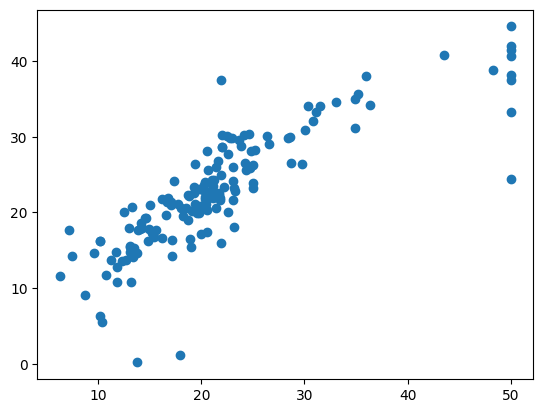

In [31]:
## plot a scatter plot for the prediction
import matplotlib.pyplot as plt
plt.scatter(y_test,reg_pred)

In [32]:
residuals=y_test-reg_pred

In [33]:
residuals

27    -1.416948
295   -1.363332
144    1.004423
255   -1.875429
483    0.168117
         ...   
31    -4.743122
333   -1.205004
417    4.918604
359    2.597573
357   -0.626443
Name: MEDV, Length: 152, dtype: float64

In [34]:
## ploting the residuals

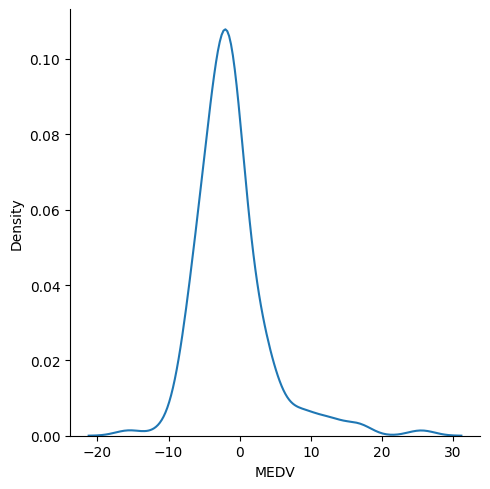

In [37]:
import seaborn as sns
sns.displot(residuals, kind="kde")

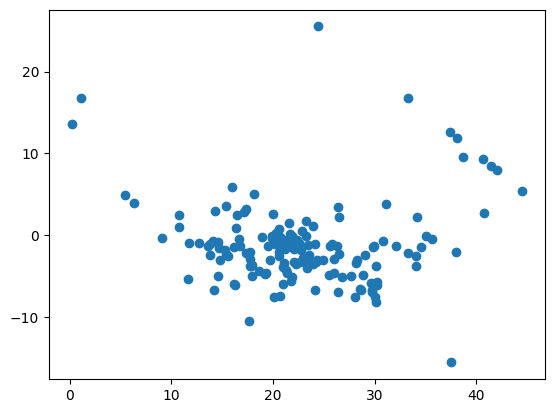

In [39]:
## scatter plot with respect to predications and residuals 
## unifrom distribution
plt.scatter(reg_pred,residuals)

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test and reg_pred are your variables
mse = mean_squared_error(y_test, reg_pred)
mae = mean_absolute_error(y_test, reg_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 27.59114781959288
Mean Absolute Error: 3.786985556834322


In [42]:
#R square and adjusted R square

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print("r square:",score)
adjusted_r2 = 1 - (1 - score) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print("Adjusted R-squared:", adjusted_r2)


r square: 0.6876813055748201
Adjusted R-squared: 0.6582599792883901


In [52]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
df.iloc[:,:-1]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
